# Part I - (Airline On-Time Performance)

## by YUSUF ABDULGANIYU
<a id="0"></a> <br>
## TABLE OF CONTENTS

1. [IMPORTING PACKAGES](#ip)
1. [DATA GATHERING](#dg)
1. [ASSESSING DATA](#ad)
1. [DATA CLEANING](#dc)
1. [UNIVARIATE EXPLORATION](#ue)
1. [BIVARIATE EXPLORATION](#be)
1. [MULTIVARIATE EXPLORATION](#me)
1. [CONCLUSION](#con)

## Introduction
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, covering a 5 years period of daily data from 2004 to 2008.

<a id = 'ip'> </a>
## Importing packages


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from functools import reduce

%matplotlib inline

<a id = 'dg'> </a>
### GATHERING FLIGHTS DATASET FOR ANALYSIS

In [2]:
# loading datasets and joinning to a single dataframe
df_flights=[] #Initializing lists of dataframes
for file in glob.glob("*.csv"):    
    df = pd.read_csv(file, encoding='latin-1')    
    df_flights.append(df)
    
flights_df = pd.concat(df_flights, ignore_index=True)   


<a id = 'ad'> </a>
### ASSESSING FLIGHTS DATASET

In [3]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [4]:
flights_df.shape

(31254220, 29)

In [5]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31254220 entries, 0 to 31254219
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

In [6]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,3.125422e+07,3.125422e+07,3.125422e+07,3.125422e+07,3.064561e+07,3.125422e+07,3.057878e+07,3.125422e+07,3.125422e+07,3.057878e+07,...,3.125422e+07,3.118412e+07,3.118978e+07,3.125422e+07,3.125422e+07,2.944959e+07,2.944959e+07,2.944959e+07,2.944959e+07,2.944959e+07
mean,2.005707e+03,6.219537e+00,1.572937e+01,3.940332e+00,1.342441e+03,1.334938e+03,1.488942e+03,1.498484e+03,2.134483e+03,1.254005e+02,...,7.216466e+02,7.252319e+00,1.587136e+01,1.947292e-02,2.138303e-03,3.482140e+00,7.491579e-01,3.795502e+00,2.599615e-02,4.524247e+00
std,1.264557e+00,3.474175e+00,8.785927e+00,1.989414e+00,4.770112e+02,4.636849e+02,5.014702e+02,4.798201e+02,1.942576e+03,7.094416e+01,...,5.689570e+02,3.417008e+01,1.231674e+01,1.381801e-01,4.619233e-02,1.926072e+01,9.117122e+00,1.591936e+01,1.176327e+00,1.970240e+01
min,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-7.100000e+02,...,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+01,0.000000e+00,0.000000e+00
25%,2.005000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.320000e+02,9.300000e+02,1.112000e+03,1.119000e+03,5.890000e+02,7.400000e+01,...,3.160000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.006000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.517000e+03,1.520000e+03,1.470000e+03,1.060000e+02,...,5.620000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.734000e+03,1.723000e+03,1.913000e+03,1.910000e+03,3.345000e+03,1.560000e+02,...,9.480000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.912000e+03,1.879000e+03,...,4.962000e+03,1.523000e+03,3.905000e+03,1.000000e+00,1.000000e+00,2.580000e+03,1.510000e+03,1.392000e+03,5.330000e+02,1.366000e+03


> The flight datasets obtained from 2004 to 2008 monthly data extraction contain 31,254,220 records and 29 features. The column names appear to need adjustment for better readability and referencing, which will be done in our following line of codes.

<a id = 'dc'> </a>
### CLEANING DATASET 

#### DEFINE
> Change column names to more readable and callable format

#### CODE

In [7]:
#renaming column names
flights_df.rename(columns={'Year':'year', 'Month': 'month', 'DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
                           'DepTime':'departure_time', 'CRSDepTime':'crs_dep_time','ArrTime':'arrival_time', 'CRSArrTime':'crs_arrival_time',
                           'UniqueCarrier':'unique_carrier','FlightNum':'flight_num', 'TailNum':'tail_num','ActualElapsedTime':'actual_elapsed_time',
                           'CRSElapsedTime':'crs_elapsed_time', 'AirTime':'air_time', 'ArrDelay':'arrival_delay','DepDelay':'departure_delay',
                           'Origin':'origin', 'Dest':'destination', 'Distance':'distance','TaxiIn':'taxi_in', 'TaxiOut':'taxi_out',
                           'Cancelled':'cancelled', 'CancellationCode':'cancellation_code','Diverted':'diverted', 'CarrierDelay':'carrier_delay',
                           'WeatherDelay':'weather_delay','NASDelay':'nas_delay', 'SecurityDelay':'security_delay', 'LateAircraftDelay':'late_aircraft_delay'},
                  inplace=True
                 )

#### TEST

In [8]:
flights_df.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'departure_time',
       'crs_dep_time', 'arrival_time', 'crs_arrival_time', 'unique_carrier',
       'flight_num', 'tail_num', 'actual_elapsed_time', 'crs_elapsed_time',
       'air_time', 'arrival_delay', 'departure_delay', 'origin', 'destination',
       'distance', 'taxi_in', 'taxi_out', 'cancelled', 'cancellation_code',
       'diverted', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

### What is the structure of your dataset?

> There are 31,254,220 flights trips in the dataset with 29 features (year, month, day_of_month, day_of_week, departure_time, crs_dep_time, arrival_time, crs_arrival_time, unique_carrier, flight_num, tail_num, actual_elapsed_time, crs_elapsed_time, air_time, arrival_delay, departure_delay, origin, destination, distance, taxi_in, taxi_out, cancelled, cancellation_code, diverted, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay). Most variables are numeric.

### What is/are the main feature(s) of interest in your dataset?

> The interest would be focused on factors that are responsible for causing delays and cancellations over the 5 years period of study, with a look at certain destinations or origins that are home to delays. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of interest are factors that are attributed to delays with arrival and departure, cancellation codes, and reasons.

<a id = 'ue'> </a>
## Univariate Exploration

> Let's begin with our main point of interest, arrival and departure delays, cancellation causes distribution.

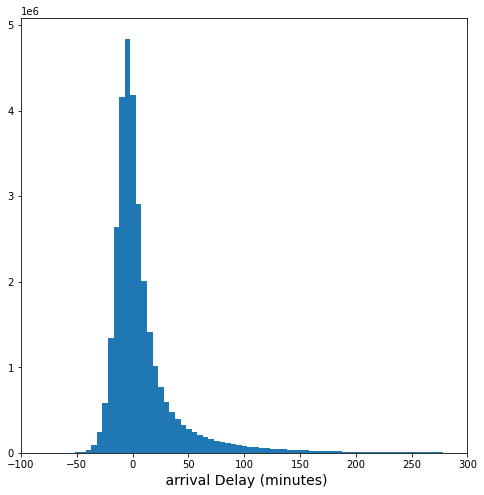

In [9]:
#delay plot function
def delay_plot(kind,xlimL,xlimU):
    ''' This function plots the delays distribution histogram based on passed arg in kind'''
    plt.figure(figsize=(8,8))
    
    min = flights_df[kind + '_delay'].min()
    max = flights_df[kind + '_delay'].max()
    
    bins = np.arange(min, max + 5, 5)
    plt.hist( data = flights_df, x = kind + '_delay', bins=bins);
    #plt.xlim(-100,300)
    plt.xlim(xlimL,xlimU)
    plt.xlabel(' {} Delay (minutes)'.format(kind),fontsize=14)
    plt.show()
    
#Plotting distribution of arrival delay    
delay_plot('arrival',-100,300)

> As depicted by the histogram above, the dataset is dense between -50 and 50. A further investigation would be centered on arrival delay > 0. The overall distribution is unimodal and skewed to the right. In the next graph, we would be looking at the distribution of arrival.

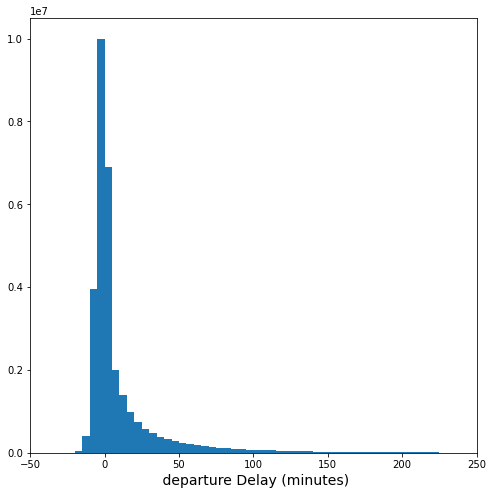

In [10]:
# checking distribution for departure delay
delay_plot('departure',-50,250)

> The appears to be a long tail in the distribution skewness to the right. The departure delay is highly dense between time 0 to 25 minutes. let's proceed to looking at the reasons for cancellation in the dataset. 

## Most common reason for cancellation in the dataset

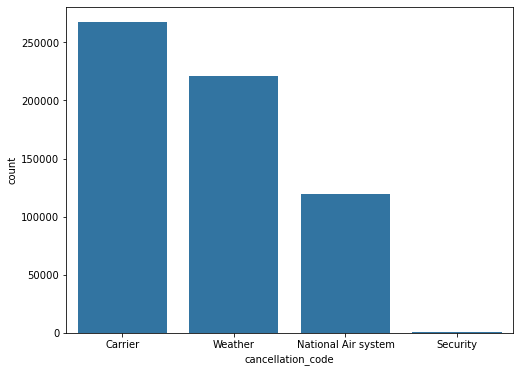

In [11]:
# obtainning the most common reason for cancellation plot 
plt.figure(figsize=[8,6])
base_color = sns.color_palette()[0]
g = sns.countplot(data= flights_df, x= 'cancellation_code', color= base_color,
              order=['A','B','C','D']);
g.set_xticklabels(['Carrier','Weather','National Air system','Security']);

> The [cancellation codes](https://www.transtats.bts.gov/FieldInfo.asp?Svryq_Qr5p=f2rpvsvr5%FDgur%FDern510%FDS14%FDPn0pryyn6v10&Svryq_gB2r=Pun4&Y11x72_gnoyr=Y_PNaPRYYNgVba&gnoyr_VQ=FGJ&flf_gnoyr_anzr=g_bagVZR_eRcbegVaT&fB5_Svryq_anzr=PNaPRYYNgVba_PbQR) as depicted by the above bar plot can be observed that most cancellation is due to **carrier**, followed by **weather**, with **security** being the least of all cancellation causes. let's further investigate the carrier with the most cancellations being the highest cause of cancellations.


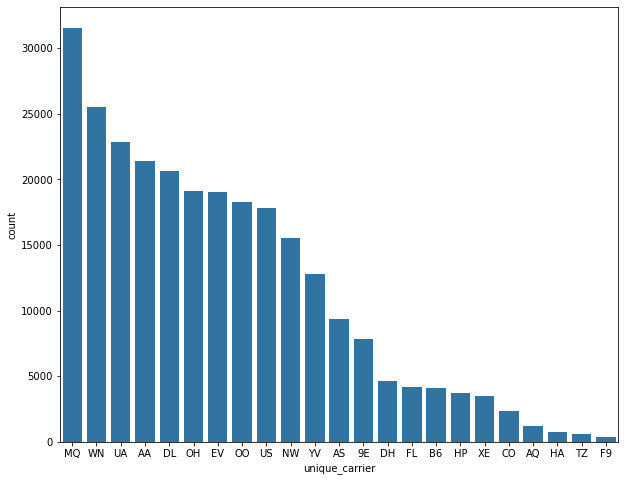

In [12]:
def cancellation_plot(arr,code):
    ''' This plots the cancellation graphs with the provided arr as entity of interest, and cancellation code'''
    plt.figure(figsize=[10,8])
    color = sns.color_palette()[0]
    x = flights_df[arr][flights_df.cancellation_code == code]
    sns.countplot(x = x, color = color, order= x.value_counts().index)
    plt.xlabel(arr)
    plt.show()

cancellation_plot('unique_carrier','A')

> As can be illustrated from the bar graph above, it shows MQ(Envoy Air) to be highest carrier cancellations, followed by WN (Southwest Airlines), and UA (United Airlines, Inc)) which are the top three carriers with the highest cancellations. The least is f9 (Frontier Airlines, Inc.).

> Let's further dive down to the next highest cause of cancellation, **Weather**, associated with time. This prompts the need to investigate months of the years of study with the most cancellation.

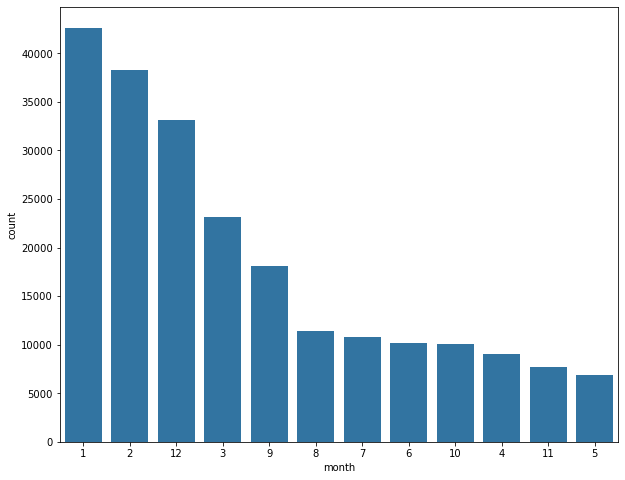

In [13]:
# Plotting for weather cancellations by months
cancellation_plot('month','B')

> It is interesting to note that the first two months see the most cancellations, i.e January and February, followed by December being the third month with the most cancellation for the 5 years study period. We can explore this more in bivariate distributions where we can check relationships to other features and possibly fetch likable causes from the analysis of USA flight data.

> Let's further check what yearly cancellation looks like over 5 years study period comprising the whole cancellation reasons.

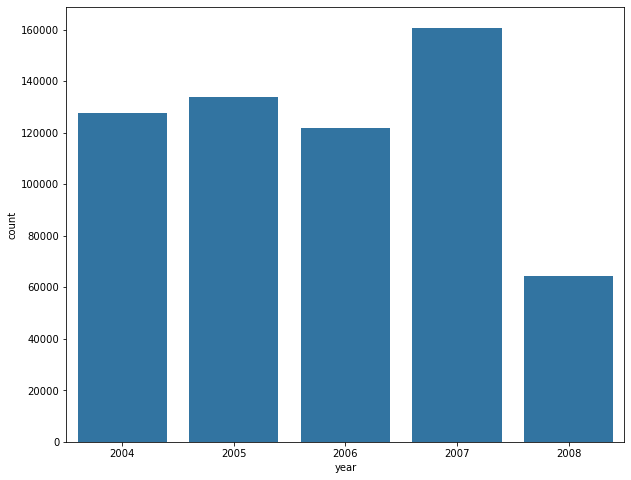

In [14]:
plt.figure(figsize=[10,8])
color = sns.color_palette()[0]
delay_code = flights_df.loc[:,['year','month','cancellation_code']].query("cancellation_code in ['A','B','C','D']")
sns.countplot(data = delay_code, x = 'year', color = color);
plt.xlabel('year');

> It clearly visible year 2007 had the most cancellation, followed by the year 2005, and the least period is the year 2008. Probably, a lot of cancellation issues have been rectified.

> So far, We have also explored delays in departure and arrival of flights to understand their distribution. There was a need to limit the x-axis in the histogram, to have a closer look at the density of the distribution.
To explore the carriers that had cancellations, filtering was done to extract records with cancellation codes (A, B, C, or D). We were then able to determine cancellations by carriers, weather, and combined cancellation codes, with a look at months and years.

Let's take a look at the origin and destination that are home to departure and delay respectively in the next lines of codes with a look at:
- The passengers that experienced arrival delay, where are they coming from?
- The passenger that experienced departure delay, where are they going to?


In [15]:
#filtering distination with departure delay greater than 0  
dep_delay_df = flights_df.loc[:,['year','month','destination','departure_delay','carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].query('departure_delay > 0')

#filtering origin with arrival delay greater than 0 
arr_delay_df = flights_df.loc[:,['year','month','origin','arrival_delay','carrier_delay','weather_delay',
                                 'nas_delay','security_delay','late_aircraft_delay']].query('arrival_delay > 0')


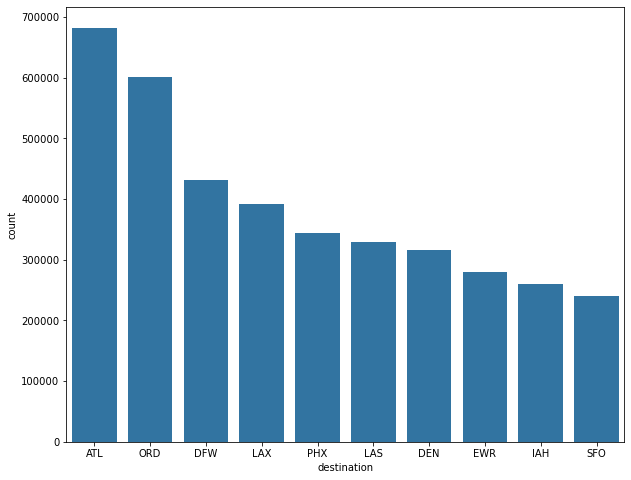

In [16]:
def delay_city(arr,count, details = False):
    ''' plotting the delay in respect to arr, corresponding to arrival delay vs origin, or departure delay vs destination '''
    if arr == 'destination':
        data = dep_delay_df
    elif arr == 'origin':
        data = arr_delay_df
    else:
        print('Incorrect arr passed')
         
    plt.figure(figsize=[10,8])
    color = sns.color_palette()[0]
    order = data[arr].value_counts().iloc[:count].index
    sns.countplot(data = data, x= arr, color = color, order = order);
    
delay_city('destination',10)

> Limiting by 10 highest to avoid overplotting and have a better view of the destination with the highest departure delay. It can be observed, ATL (Atlanta, GA: Hartsfield-Jackson Atlanta International), ORD (Chicago, IL: Chicago O'Hare International), DFW (Dallas/Fort Worth, TX: Dallas/Fort Worth International), and LAX (Los Angeles, CA: Los Angeles International) are the highest four in the destinations with the departure delay.
Let's proceed to check the origin with the highest arrival delay in the next plot.

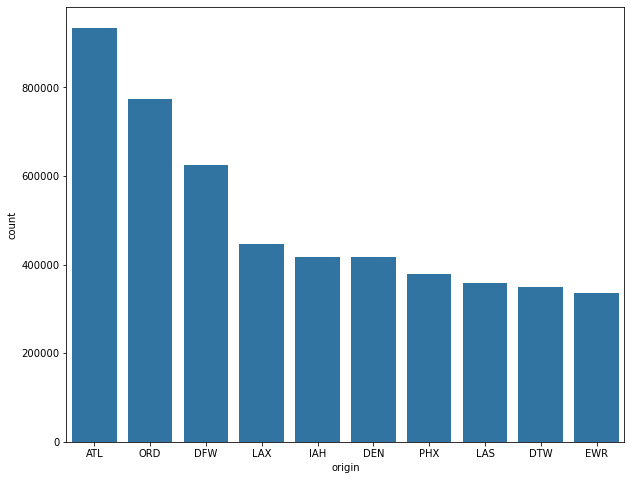

In [17]:
# Obtaining graph of origin with arrival delay.
delay_city('origin',10)

> The illustration in the graph above further drives tends to further drive the point of the previous graph of destination with departure delay. It's logical to say, the departure delay from the origin caused the arrival delay at the destination. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The arrival delay distribution is dense between -50 and 50 minutes and appears to be unimodal and skewed to the right, similar to the distribution of arrival, which exhibits skewness to the right. The departure delay is highly dense between time 0 to 25 minutes.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No tidy issue was adjusted during the course of the analysis, only column names were renamed for easy referencing. Extraction was done for the cancellation code to obtain the major causes of cancellation provided by the datasets.

<a id = 'be'> </a>
## Bivariate Exploration

> A continuation on areas of interest, factors causing cancellation, and delays. We would in this section, investigate relationships between pairs of variables in our 5 years study data. To start off, I want to look at the pairwise correlations present between delay features in the data.

In [18]:
#Numeric features for correlation test
numeric_vars = ['departure_delay','arrival_delay','distance','month']

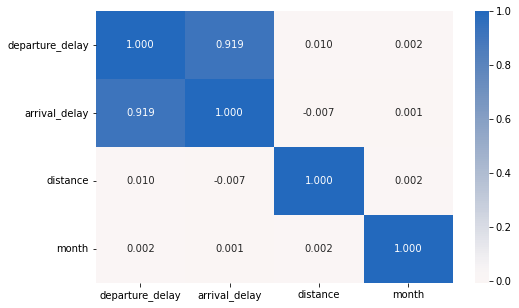

In [19]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(flights_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

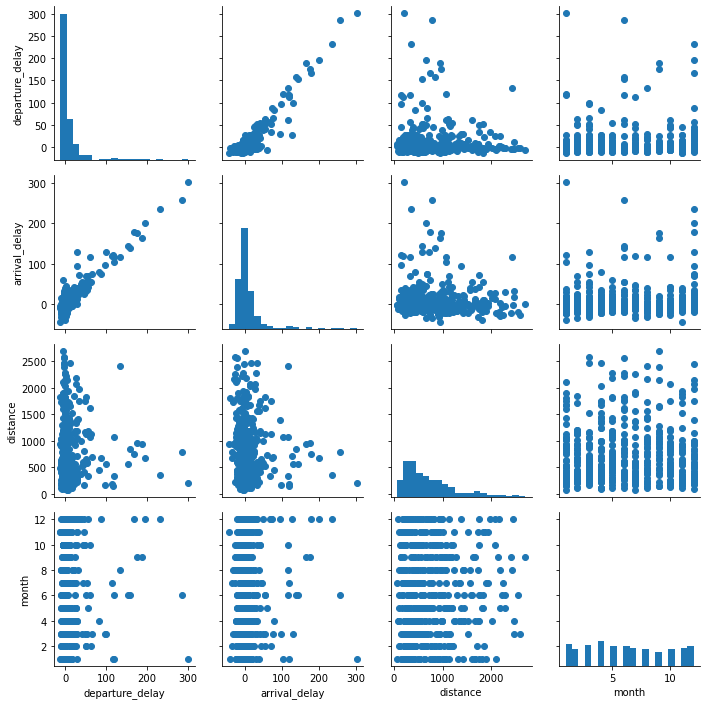

In [20]:
# plot scatter plot matrix: sample 500 flights, so that plots are clearer and render faster
samples = np.random.choice(flights_df.shape[0], 500, replace = False)
flights_samp = flights_df.loc[samples,:]

g = sns.PairGrid(data = flights_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

>  As expected, there is a strong relationship of about 91% between arrival and departure delays. The other pairwise correlation between other features exhibits a weak positive or negative relationship as shown in the plots above. Let's have a better view of the correlation between departure and delay using a scatter plot and obtaining the line of fit in our next graph.

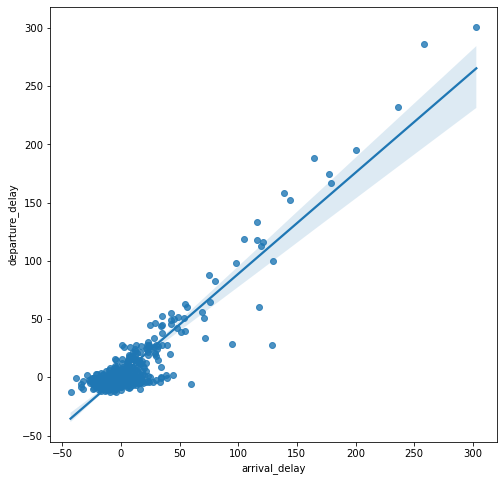

In [21]:
# obtainning line of fit for better illustration
plt.figure(figsize=[8,8])

sns.regplot(data=flights_samp, y = 'departure_delay', x='arrival_delay')

plt.show()

> Next, let's consider the cause of delay with respect to the cancellation code if there exists seasonality in the monthly data over the 5 years study period.

<Figure size 720x1008 with 0 Axes>

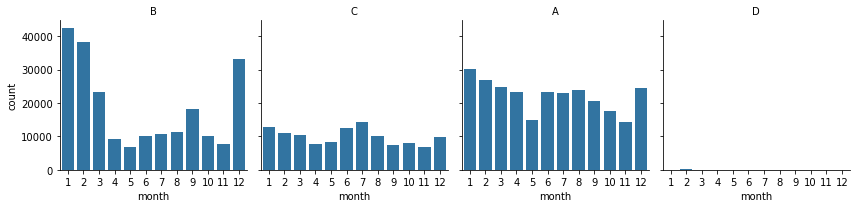

In [22]:
#plotting for Seasonality check
plt.figure(figsize=[10,14]);
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sns.FacetGrid(data=delay_code,col='cancellation_code');
g.map(sns.countplot,'month',order=month_order);
g.set_titles("{col_name}");

> It can be observed in the above visual, the month of January and February, followed by December, experience the most delays due to carrier and weather. Unlike the monthly plot of the National air system that shows May, June, and January as the highest monthly faced by national air system delays. No security delays were experienced by the monthly plots shown above. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Arrival and departure delays had a strong positive linear relationship of about 91%. The other pairwise correlation between other features exhibits a weak positive or negative relationship. It was observed, ATL (Atlanta, GA: Hartsfield-Jackson Atlanta International), ORD (Chicago, IL: Chicago O'Hare International), DFW (Dallas/Fort Worth, TX: Dallas/Fort Worth International), and LAX (Los Angeles, CA: Los Angeles International) are the highest four in both destinations and origin, with highest departure and arrival delay. One can say logically, the departure delay from the origin caused the arrival delay at the destination.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There exist no other relationship aside from the main features, a small weak positive and negative correlation was observed between other features.

<a id = 'me'> </a>
## Multivariate Exploration

> Let's investigate the average delays with respect to origin and destination, with a view to understanding the major delay caused at the respective location airport. Afterward, we would look at monthly trends in delays contributing mostly to the inefficiency of flight on time through the years.

In [23]:
# Destination city dataset with departure delays greater than 0
dst_city_delay = dep_delay_df.query("destination in ['ATL','ORD','DFW','LAX']").groupby('destination')[['carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].mean().reset_index()

# Arrival city dataset with departure delays greater than 0
arr_city_delay = arr_delay_df.query("origin in ['ATL','ORD','DFW','LAX']").groupby('origin')[['carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].mean().reset_index()

In [24]:
dst_city_delay

,destination,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ATL,9.748656,2.562200,14.414591,0.044629,9.257577
1,DFW,8.932891,2.579363,6.625915,0.050024,14.340236
2,LAX,8.220238,1.019636,4.476983,0.080814,10.218628
3,ORD,7.660831,1.394167,22.109752,0.038760,14.881637


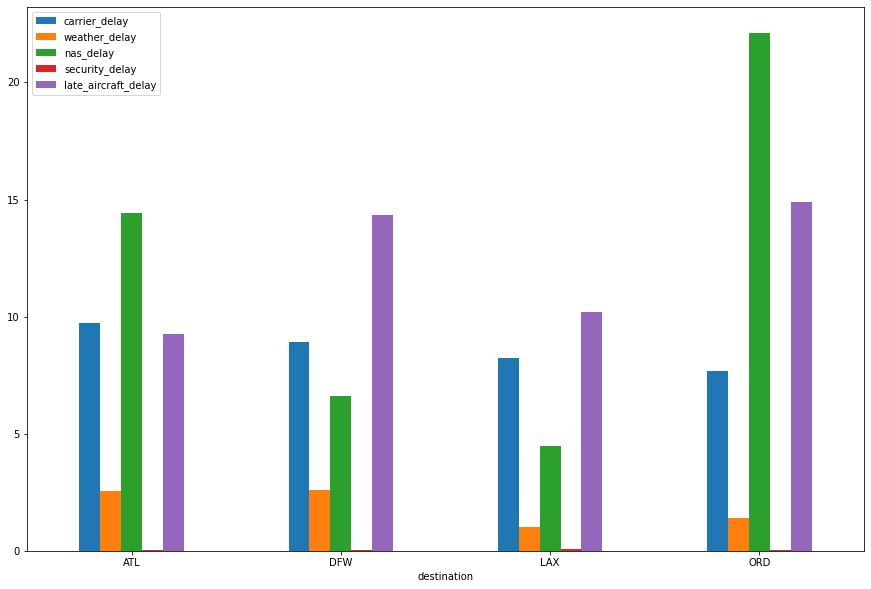

In [25]:
#plotting average delays with respect to destination cities. 
dst_city_delay.plot(kind='bar', x='destination', figsize=[15,10]);
plt.xticks(rotation=0);

> Hartsfield-Jackson Atlanta International(ATL) as a destination, experienced more departure delays as a result of National air systems, Dallas/Fort Worth International (DFW) and Los Angeles International (LAX), experienced more delays from late aircraft, Chicago O'Hare International (ORD) on the other hand, experienced more delays from the national air system. The least cause of delays in all cities is a delay due to security. Let's proceed to investigate the origin cities with respect to arrival delays.

In [26]:
arr_city_delay

,origin,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ATL,9.709246,2.830453,6.903149,0.021951,8.928842
1,DFW,8.310847,3.340786,7.238577,0.016004,9.189981
2,LAX,7.439029,0.423963,4.968545,0.111384,7.711639
3,ORD,9.643189,2.017465,8.753377,0.012638,17.240450


Text(0, 0.5, 'AVERAGE DELAYS')

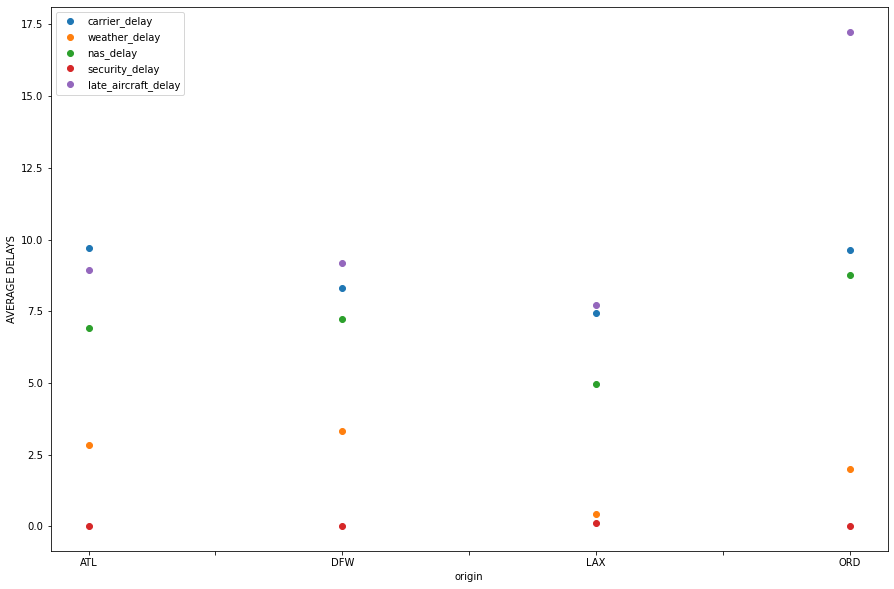

In [27]:
#plotting average delays with respect to Origin cities. 
arr_city_delay.plot(x = 'origin',figsize = (15,10), linestyle = '', marker = 'o')
plt.legend()
plt.ylabel('AVERAGE DELAYS')

>  Hartsfield-Jackson Atlanta International(ATL) as origin cities, experienced more arrival delays as a result of a carrier delay, Dallas/Fort Worth International (DFW), Los Angeles International (LAX), and Chicago O'Hare International (ORD) experienced more delays from late aircraft. Although the margin between late aircraft and carrier delay, in DFW and LAX, is not as high as the gap in ORD late aircraft, to carrier delay, which was the second most prominent delay cause. Next, we would be investigating the trend analysis.

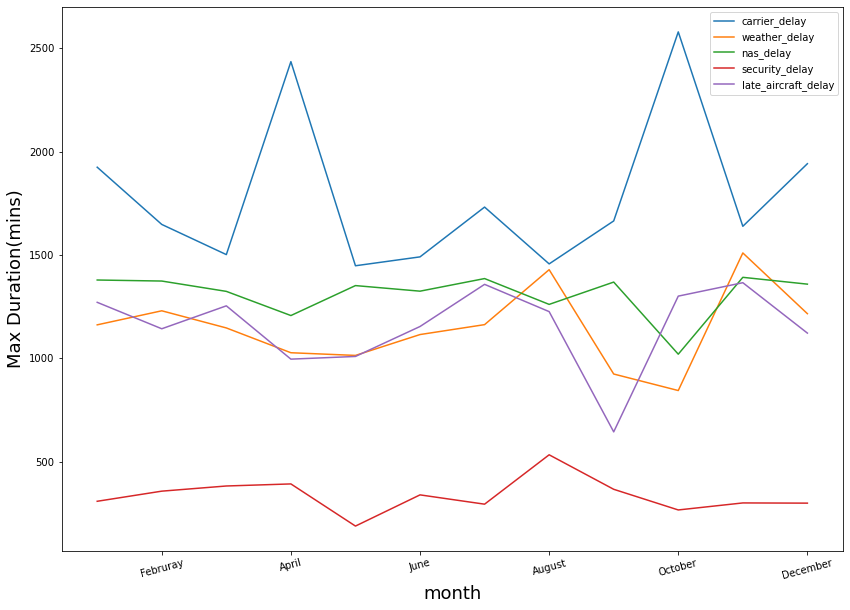

In [31]:
# Initializing delay factors 
delay_sets = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

def delay_trends(duration):
    '''  This function plots the trend of the duration passed in as arg  '''
    delay_df = []
    for delay in delay_sets:
        # looping dataframe creation
        df_delay = flights_df.query(f'{delay} > 0').groupby(duration)[delay].max().reset_index(name = delay)
        # merging created dataframes
        delay_df.append(df_delay)
   
    #plotting graphs
    df_merged = reduce(lambda left,right: pd.merge(left,right,on=[duration]), delay_df)
    plt.figure(figsize=(14,10))
    for delay in delay_sets:
        sns.lineplot(data=df_merged,x = duration, y=delay)
    plt.xlabel(duration, fontsize=18)
    plt.ylabel('Max Duration(mins)', fontsize=18)
    plt.xticks(ticks=[2,4,6,8,10,12], labels=['Februray','April','June','August',
                                             'October','December'], rotation = 15)
    plt.legend(delay_sets)
    
    
delay_trends('month')

> From the graph above, it can be seen that there are higher delay duration caused by carriers, with its peak at April and October, followed by the national air system, which only experienced a drop from September, and a sudden increase in November. Late aircraft delay and weather delay tends to experience a close movement in their maximum duration trend. Both experience a sudden drop in August, and lowest in September and October respectively. Further investigation could further check to see if there is a relation between late aircraft delay and carrier delay. Overall, It can be observed that there is a large variation in the maximum delays from month to month. Delays due to security reasons are the least common with less variation.
Multivariate analysis further supports the finding that carrier delay and late air craft delays, had the highest duration of delays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of delays caused by origin and destination cities, and also the monthly trends of average delay over the period of study.  weather, carrier, and late flight are major influences on arrival and departure delays. 

### Were there any interesting or surprising interactions between features?

> Looking back at the course of analysis, it doesn't seem like there's any relationship between the four categorical features of cancellation code, origin, and destination city. However, the numeric features appeared to have given the plot and insights required to obtain major delay causes in various cities.

<a id = 'con'> </a>
## Conclusions
> The Airline's on-time performance datasets as obtained from the extraction of 2004 to 2008 monthly data contain 31,254,220 records and 29 features. The column names were adjusted for better readability and references. Most cancellation is due to the carrier, followed by weather, with security being the least of all cancellation causes, This means there have been very few instances of delays/cancellations due to security reasons. It's clearly the visible year 2007 had the most cancellation, followed by the year 2005, and the least period is the year 2008. Probably, a lot of cancellation issues have been rectified. The distribution of departure and arrival delays was all unimodal and skewed to the right.
A look at cancellations by carriers and weather, with respect to month and years, was determined, shows MQ(Envoy Air) to be the highest with carrier cancellation, followed by WN (Southwest Airlines), and UA (United Airlines, Inc)) are the top three carriers with highest cancellations. The least is f9(Frontier Airlines, Inc.). It is interesting to note that the first two months see the most cancellations, i.e January and February, followed by December being the third month with the most cancellation for the 5 years study period due to weather.

> In the **bivariate analysis section**, there appears to be a strong relationship of about 91% between arrival and departure delays. The other pairwise correlation between other features exhibits a weak positive or negative relationship, illustrated using a heatmap and scatter plot. **Multivariate analysis**, shows that higher delay duration are caused by carriers, with its peak at April and October, followed by the national air system, which only experienced a drop from September, and a sudden increase in November. Late aircraft delay and weather delay tends to experience a close movement in their maximum duration trend. Both experience a sudden drop in August, and lowest in September and October respectively. Further investigation could further check to see if there is a relation between late aircraft delay and carrier delay. Overall, It can be observed that there is a large variation in the maximum delays from month to month. Delays due to security reasons are the least common with less variation.

## Limitation

> I was interested in further extending the years of study for the airline's on-time performance, but due to the size of the dataset, it consumes a lot of system resources to compute. Hence, that leads to the usage of just the 5 years of data, as it's able to run on minimal system resources.

## References

- stackoverflow.com
- Udacity example submission
